In [775]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import  pdist
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings('ignore')

## 1-Data Exploration

In [776]:
# Load the dataset
df = pd.read_csv("train.csv")

df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [777]:
# Gets the info about rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [778]:
# Checks for missing values
Missing_values = df.isnull().sum()
Missing_values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [779]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [780]:
print(f"First order recorded in: {df['Order Date'].min()}")
print(f"Last order recorded in: {df['Order Date'].max()}")

First order recorded in: 2015-01-03 00:00:00
Last order recorded in: 2018-12-30 00:00:00


## 2-Data Cleaning

In [781]:
df_filtered = df[['Order ID',  'Order Date', 'Sales', 'Customer ID']].copy()

In [782]:
df_filtered.isnull().sum()

Order ID       0
Order Date     0
Sales          0
Customer ID    0
dtype: int64

In [783]:
df_filtered.dtypes

Order ID               object
Order Date     datetime64[ns]
Sales                 float64
Customer ID            object
dtype: object

## 3-Feature Engineering

Recency: Khoảng cách ngày mua hàng gần đây nhất 
Frequency: Tần suất mua hàng
Monetary: Tổng số tiền mà khách hàng đã mua hàng

In [784]:

date_snapshot =  df_filtered['Order Date'].max() + pd.Timedelta(days=1)

customers = df_filtered.groupby('Customer ID').agg({'Order Date':lambda x: (date_snapshot - x.max()).days,
                                                   'Order ID':'nunique',
                                                   'Sales':'sum'}).rename(columns={'Order Date':'Recency',
                                                                                         'Order ID': 'Frequency',
                                                                                         'Sales': 'Monetary'}).reset_index()


In [785]:
print(customers.head())
print('=============================================')
print(customers.describe())

  Customer ID  Recency  Frequency  Monetary
0    AA-10315      185          5  5563.560
1    AA-10375       20          9  1056.390
2    AA-10480      260          4  1790.512
3    AA-10645       56          6  5086.935
4    AB-10015      416          3   886.156
           Recency   Frequency      Monetary
count   793.000000  793.000000    793.000000
mean    149.286255    6.206810   2851.874884
std     187.081466    2.525647   2620.668723
min       1.000000    1.000000      4.833000
25%      31.000000    4.000000   1081.466000
50%      76.000000    6.000000   2215.002000
75%     185.000000    8.000000   3670.258000
max    1166.000000   17.000000  25043.050000


In [786]:
import matplotlib.pyplot as plt
import seaborn as sns

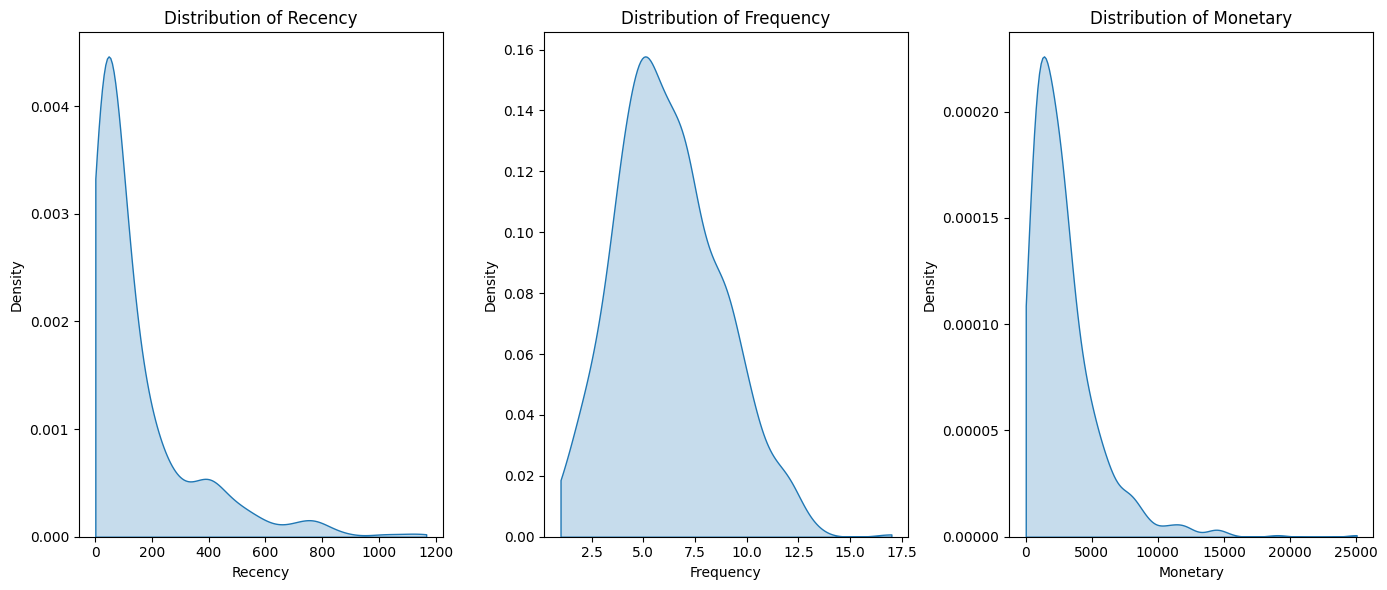

In [787]:
fig, axes = plt.subplots(1,3, figsize=(14,6))

sns.kdeplot(data=customers, x='Recency', ax=axes[0], fill=True, cut=0)
axes[0].set_title('Distribution of Recency')

sns.kdeplot(data=customers, x='Frequency', ax=axes[1], fill=True, cut=0)
axes[1].set_title('Distribution of Frequency')

sns.kdeplot(data=customers, x='Monetary', ax=axes[2], fill=True, cut=0)
axes[2].set_title('Distribution of Monetary')

plt.tight_layout()

## 4-Data Preprocessing

In [788]:
from sklearn.preprocessing import PowerTransformer

In [789]:
customer_ids = customers['Customer ID']

customers_numeric = customers.drop(columns=['Customer ID'])

pt = PowerTransformer(method='box-cox')
customers_transformed = pt.fit_transform(customers_numeric)

customers_transformed_with_id = pd.DataFrame(customers_transformed, columns=customers_numeric.columns)
customers_transformed_with_id['Customer ID'] = customer_ids

customers_transformed_with_id.insert(0, 'Customer ID', customers_transformed_with_id.pop('Customer ID'))

print(customers_transformed_with_id)


    Customer ID   Recency  Frequency  Monetary
0      AA-10315  0.692106  -0.413570  1.158673
1      AA-10375 -0.996780   1.090944 -0.690950
2      AA-10480  0.986632  -0.849832 -0.196385
3      AA-10645 -0.263415  -0.006897  1.034780
4      AB-10015  1.410880  -1.326315 -0.839639
..          ...       ...        ...       ...
788    XP-21865 -0.442283   1.751460  0.100852
789    YC-21895 -1.868145  -0.413570  1.130973
790    YS-21880 -1.448133   0.741627  1.430737
791    ZC-21910 -0.276934   2.371178  1.700220
792    ZD-21925  0.771431  -0.413570 -0.374661

[793 rows x 4 columns]


In [790]:
customers_transformed_df = pd.DataFrame(customers_transformed_with_id, index=customers.index, columns=customers.columns)

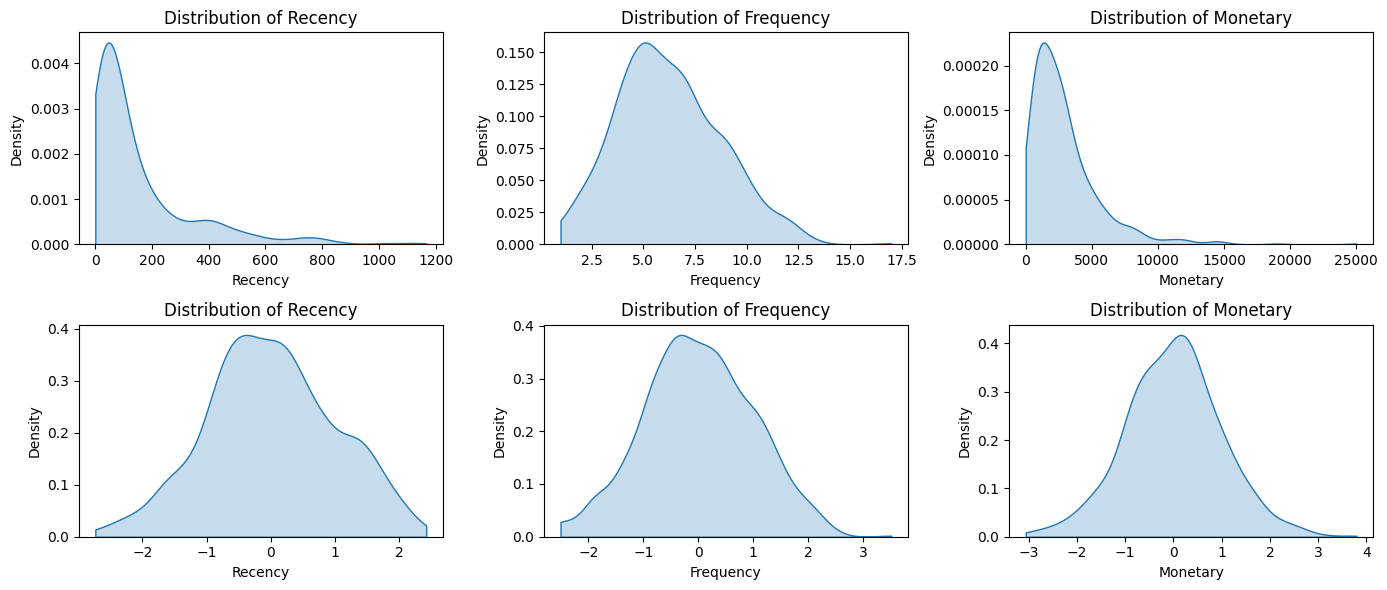

In [791]:
fig, axes = plt.subplots(2,3, figsize=(14,6))

sns.kdeplot(data=customers, x='Recency', ax=axes[0,0], fill=True, cut=0)
axes[0,0].set_title('Distribution of Recency')
sns.kdeplot(data=customers, x='Frequency', ax=axes[0,1], fill=True, cut=0)
axes[0,1].set_title('Distribution of Frequency')
sns.kdeplot(data=customers, x='Monetary', ax=axes[0,2], fill=True, cut=0)
axes[0,2].set_title('Distribution of Monetary')

sns.kdeplot(data=customers_transformed_df, x='Recency', ax=axes[1,0], fill=True, cut=0)
axes[1,0].set_title('Distribution of Recency')
sns.kdeplot(data=customers_transformed_df, x='Frequency', ax=axes[1,1], fill=True, cut=0)
axes[1,1].set_title('Distribution of Frequency')
sns.kdeplot(data=customers_transformed_df, x='Monetary', ax=axes[1,2], fill=True, cut=0)
axes[1,2].set_title('Distribution of Monetary')

plt.tight_layout()

In [792]:
custromer_copy = customers_transformed_with_id[['Recency', 'Frequency', 'Monetary']]

# 5 Hierarchical Clustering

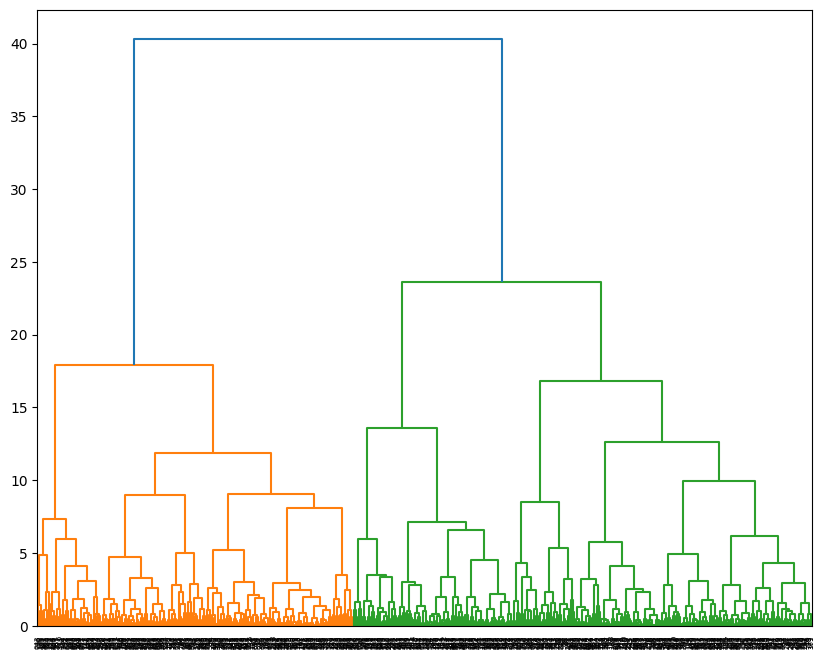

In [793]:
mergings = linkage(custromer_copy, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()


In [794]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(custromer_copy)

pred_agc = pd.Series(labels)

customers_transformed_with_id['Cluster'] = pred_agc

In [795]:
customers_transformed_with_id.head()

,Customer ID,Recency,Frequency,Monetary,Cluster
0,AA-10315,0.692106,-0.413570,1.158673,1
1,AA-10375,-0.996780,1.090944,-0.690950,0
2,AA-10480,0.986632,-0.849832,-0.196385,2
3,AA-10645,-0.263415,-0.006897,1.034780,1
4,AB-10015,1.410880,-1.326315,-0.839639,2


In [796]:
customers["Cluster"] = customers_transformed_with_id["Cluster"].copy()
customers.head()

,Customer ID,Recency,Frequency,Monetary,Cluster
0,AA-10315,185,5,5563.560,1
1,AA-10375,20,9,1056.390,0
2,AA-10480,260,4,1790.512,2
3,AA-10645,56,6,5086.935,1
4,AB-10015,416,3,886.156,2


In [798]:
# Analyzing
customers.groupby('Cluster').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean','count']}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          70.0       8.0   4594.0   323
1          89.0       5.0   1817.0   307
2         421.0       4.0   1350.0   163

In [799]:
cluster_mapping = {0:'Loyal',
                   1:'Casual',
                   2:'At-Risk'}

customers['Cluster'] = customers['Cluster'].map(cluster_mapping)
customers.head()

,Customer ID,Recency,Frequency,Monetary,Cluster
0,AA-10315,185,5,5563.560,Casual
1,AA-10375,20,9,1056.390,Loyal
2,AA-10480,260,4,1790.512,At-Risk
3,AA-10645,56,6,5086.935,Casual
4,AB-10015,416,3,886.156,At-Risk


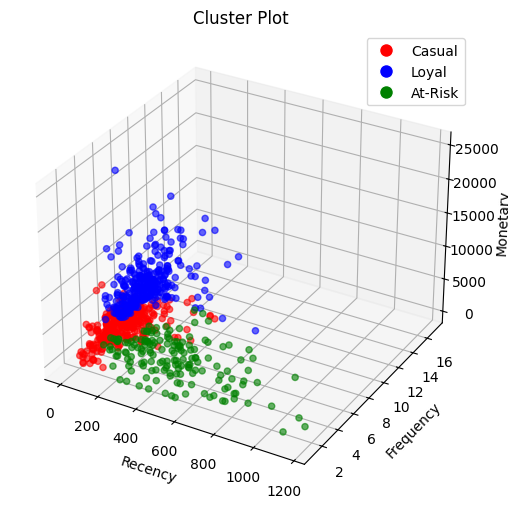

In [803]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')

cluster_colors = {'Casual': 'red', 'Loyal': 'blue', 'At-Risk': 'green'}

for cluster, color in cluster_colors.items():
    cluster_data = customers[customers['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], c=color, label=cluster, alpha=0.6)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Cluster Plot')

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in cluster_colors.items()]
ax.legend(handles=legend_handles)

# Hiển thị biểu đồ
plt.grid(True)
plt.show()


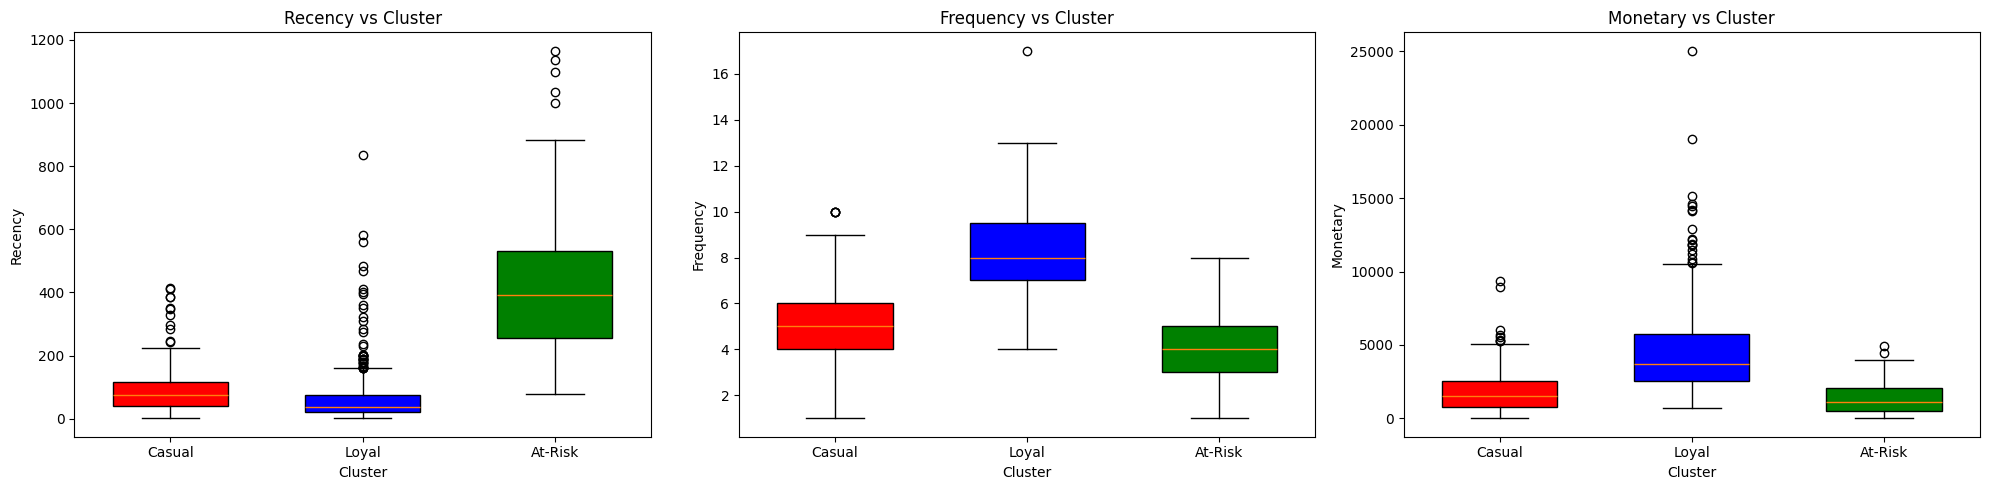

In [806]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

plt.subplot(1, 3, 1)
for cluster, color in cluster_colors.items():
    cluster_data = customers[customers['Cluster'] == cluster]
    plt.boxplot(cluster_data['Recency'], positions=[list(cluster_colors.keys()).index(cluster)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color))
plt.xticks(range(len(cluster_colors)), list(cluster_colors.keys()))
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.title('Recency vs Cluster')

plt.subplot(1, 3, 2)
for cluster, color in cluster_colors.items():
    cluster_data = customers[customers['Cluster'] == cluster]
    plt.boxplot(cluster_data['Frequency'], positions=[list(cluster_colors.keys()).index(cluster)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color))
plt.xticks(range(len(cluster_colors)), list(cluster_colors.keys()))
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency vs Cluster')

plt.subplot(1, 3, 3)
for cluster, color in cluster_colors.items():
    cluster_data = customers[customers['Cluster'] == cluster]
    plt.boxplot(cluster_data['Monetary'], positions=[list(cluster_colors.keys()).index(cluster)], widths=0.6, patch_artist=True, boxprops=dict(facecolor=color))
plt.xticks(range(len(cluster_colors)), list(cluster_colors.keys()))
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.title('Monetary vs Cluster')

plt.tight_layout()
plt.show()
